# Assessing the Effectiveness of VPD Bike Theft Prevention Programs

##### STAT 201 Group 32: Angela Felicia, Christin Wang, Linda Chu, Yifan Hao

## Introduction

Bike theft is a major issue in Vancouver. According to the Vancouver Police Department (VPD), over 2,000 bikes are stolen in Vancouver every year (Vancouver Police Department, n.d.). To combat this issue, the VPD parterned with Project 529 to implement a theft recovery and deterrent system for bikes, which was reported to be effective (McIntyre, 2023; Nettle, Nott, & Bateson, 2012).

### Our Question               
We want to assess these claims of effectiveness through statistical inference. We will compare the proportion of bike theft in Vancouver in *2012* (a year before Project 529 was created) to the proportion of bike theft in *2022* (the most recently concluded year) and identify a confidence interval for this difference-in-proportions.

We plan to focus on the Central Business District (Downtown). As bike theft often occurs around transport hubs or worksites, and high crime rate areas like Downtown (Malleson, Steenbeek, & Andresen, 2019), a valid reduction in bike theft would be more evident here.

### Dataset
Our chosen dataset is the VPD Crime dataset which contains information about the date, type, and location of a crime in Vancouver from 2003 to 2023.

## Methods and Results

### I. Preliminary Operations

#### 1. Loading the datasets


In [1]:
library(dplyr)
library(ggplot2)
install.packages("infer")
library(infer)
library(readr)
library(tidyr)
install.packages("cowplot")
library(cowplot)
install.packages("broom")
library(broom)


载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


将程序包安装入'C:/Users/chris/AppData/Local/R/win-library/4.3'
(因为'lib'没有被指定)



程序包'infer'打开成功，MD5和检查也通过

下载的二进制程序包在
	C:\Users\chris\AppData\Local\Temp\RtmpcPBjef\downloaded_packages里


将程序包安装入'C:/Users/chris/AppData/Local/R/win-library/4.3'
(因为'lib'没有被指定)



程序包'cowplot'打开成功，MD5和检查也通过

下载的二进制程序包在
	C:\Users\chris\AppData\Local\Temp\RtmpcPBjef\downloaded_packages里


将程序包安装入'C:/Users/chris/AppData/Local/R/win-library/4.3'
(因为'lib'没有被指定)



程序包'broom'打开成功，MD5和检查也通过

下载的二进制程序包在
	C:\Users\chris\AppData\Local\Temp\RtmpcPBjef\downloaded_packages里


In [2]:
cbd_2012 <- read_csv("https://drive.google.com/u/0/uc?id=1hYkqOrxvwQ7rXIw8jGVoDlUwL0a5Vn9b&export=download")
cbd_2022 <- read_csv("https://drive.google.com/u/0/uc?id=1rDToNyTlyzyVwrLMV4tamVZOdwQBVXRe&export=download")

head(cbd_2012)
head(cbd_2022)

`curl` package not installed, falling back to using `url()`
Rows: 8821 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`curl` package not installed, falling back to using `url()`
Rows: 10614 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2012,11,26,9,38,10XX BEACH AVE,Central Business District,490268.4,5458143
Break and Enter Commercial,2012,10,11,13,0,10XX CAMBIE ST,Central Business District,491327.6,5458026
Break and Enter Commercial,2012,1,8,22,1,10XX CANADA PL,Central Business District,491519.5,5459521
Break and Enter Commercial,2012,10,27,21,35,10XX CANADA PL,Central Business District,491586.3,5459502
Break and Enter Commercial,2012,12,13,5,0,10XX HAMILTON ST,Central Business District,491211.0,5458148
Break and Enter Commercial,2012,12,15,22,0,10XX HAMILTON ST,Central Business District,491261.0,5458199


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2022,2,13,6,22,10XX CANADA PL,Central Business District,491493.3,5459542
Break and Enter Commercial,2022,7,16,9,10,10XX CANADA PL,Central Business District,491493.3,5459542
Break and Enter Commercial,2022,10,2,6,29,10XX CANADA PL,Central Business District,491493.3,5459542
Break and Enter Commercial,2022,1,7,6,2,10XX CANADA PL,Central Business District,491493.4,5459542
Break and Enter Commercial,2022,2,26,18,16,10XX DUNSMUIR ST,Central Business District,491237.8,5459259
Break and Enter Commercial,2022,1,21,3,30,10XX DUNSMUIR ST,Central Business District,491238.7,5459259


#### 2. Tidying the data
Here we select our variable of interest (TYPE) to remove unecessary columns and shorten long labels.

In [3]:
cbd_2012 <- cbd_2012 %>%
  select(TYPE) %>%
  mutate(TYPE = recode(TYPE, 
                       "Break and Enter Commercial" = "B&E Commercial",
                       "Break and Enter Residential/Other" = "B&E Residential/Other",
                       "Vehicle Collision or Pedestrian Struck (with Fatality)" = "MVA (with Fatality)",
                       "Vehicle Collision or Pedestrian Struck (with Injury)" = "MVA (with Injury)"))

cbd_2022 <- cbd_2022 %>%
  select(TYPE) %>%
  mutate(TYPE = recode(TYPE, 
                       "Break and Enter Commercial" = "B&E Commercial",
                       "Break and Enter Residential/Other" = "B&E Residential/Other",
                       "Vehicle Collision or Pedestrian Struck (with Fatality)" = "MVA (with Fatality)",
                       "Vehicle Collision or Pedestrian Struck (with Injury)" = "MVA (with Injury)"))

head(cbd_2012)
head(cbd_2022)

TYPE
<chr>
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial


TYPE
<chr>
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial


#### 3. Plotting relevant raw data
We plotted the count for each crime in 2012 and 2022 in bar graphs. From the plots, we can see that the bar for bike theft is relatively short, meaning we can expect the proportions and any difference in the proportions to be generally low. Moreover, the bar for bike theft is shorter in 2022 than for 2012 which indicates a possibility of reduction in bike theft between 2012 and 2022.

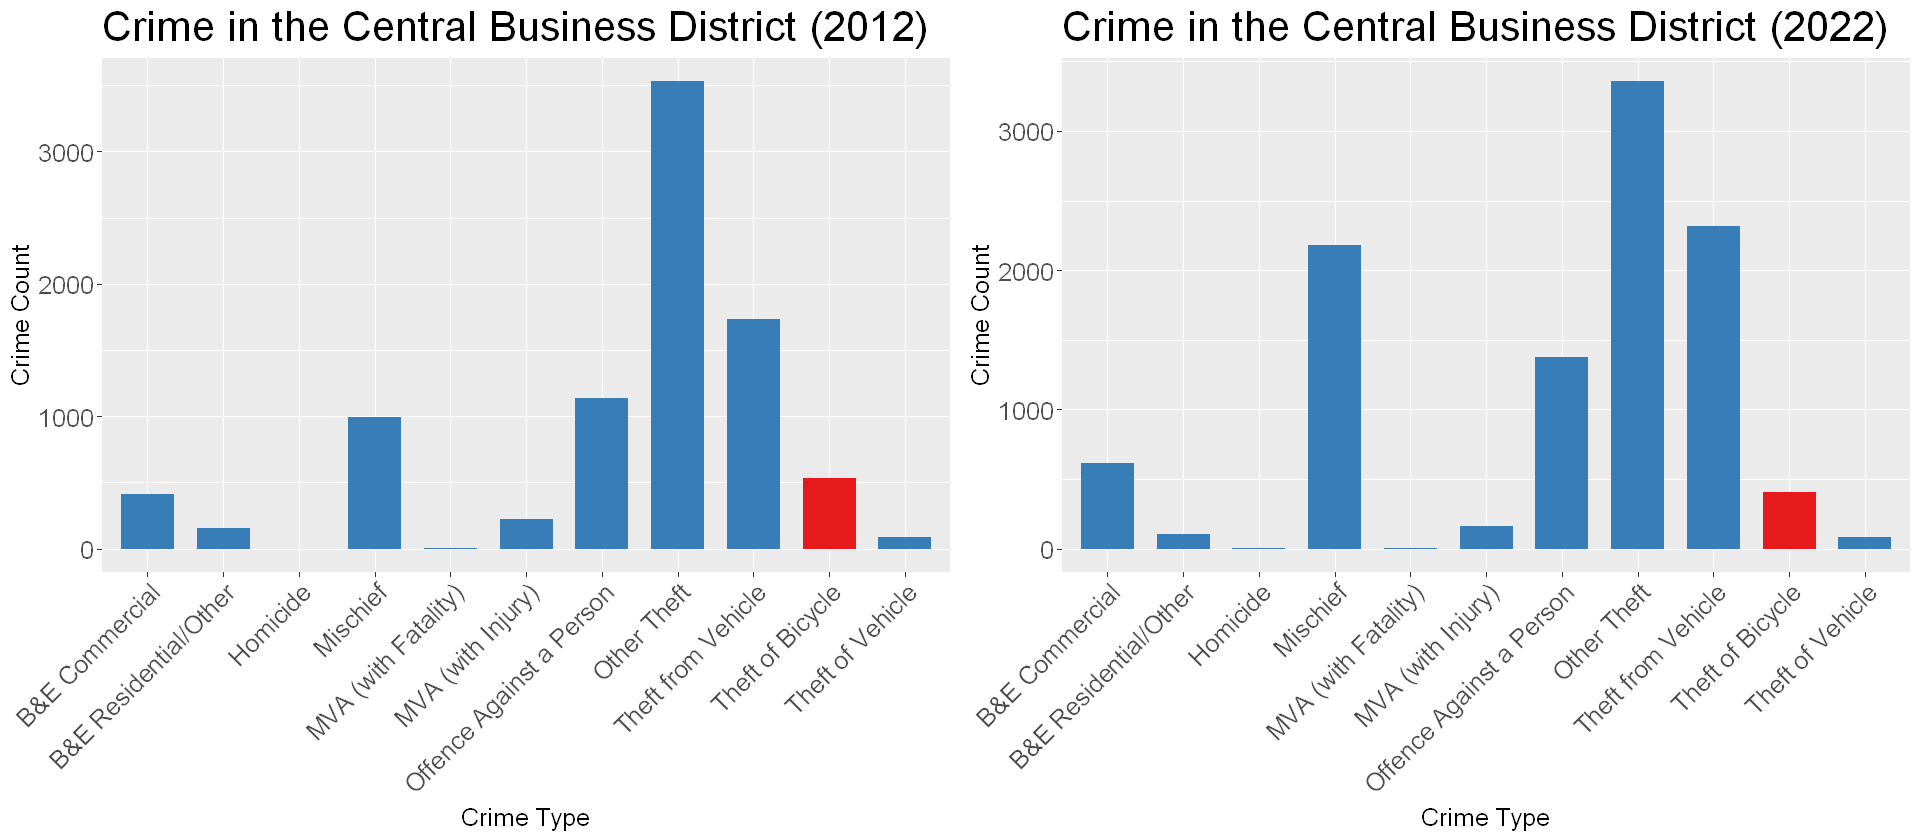

In [4]:
options(repr.plot.width = 16, repr.plot.height = 7)

cbd_2012_dist <- cbd_2012 %>%
  ggplot(aes(x = TYPE,
             fill = factor(ifelse(TYPE=="Theft of Bicycle","Category of Interest","Other")))) +
  geom_bar(width = 0.7, show.legend = FALSE) +
  scale_fill_brewer(palette = "Set1") +
  labs(x = "Crime Type", y = "Crime Count", title = "Crime in the Central Business District (2012)") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 15),
        axis.text.y = element_text(size = 15),
        axis.title = element_text(size = 15),
        legend.text = element_text(size = 15),
        plot.title = element_text(size = 25))

cbd_2022_dist <- cbd_2022 %>%
  ggplot(aes(x = TYPE,
             fill = factor(ifelse(TYPE=="Theft of Bicycle","Category of Interest","Other")))) +
  geom_bar(width = 0.7, show.legend = FALSE) +
  scale_fill_brewer(palette = "Set1") +
  labs(x = "Crime Type", y = "Crime Count", title = "Crime in the Central Business District (2022)") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 15),
        axis.text.y = element_text(size = 15),
        axis.title = element_text(size = 15),
        legend.text = element_text(size = 15),
        plot.title = element_text(size = 25))

plot_grid(cbd_2012_dist, cbd_2022_dist)

#### 4. Estimating the proportion of bike thefts

In [5]:
bike_theft_2012 <- cbd_2012 %>%
  summarize(bike_theft = sum(TYPE == "Theft of Bicycle"),
            prop_bike_theft_2012 = bike_theft / n()) %>%
  select(prop_bike_theft_2012)

bike_theft_2022 <- cbd_2022 %>%
  summarize(bike_theft = sum(TYPE == "Theft of Bicycle"),
            prop_bike_theft_2022 = bike_theft / n()) %>%
  select(prop_bike_theft_2022)

diff_in_props_22_12 <- tibble(diff_in_props = pull(bike_theft_2022) - pull(bike_theft_2012))

bike_theft_summary <- tibble(bike_theft_2012, bike_theft_2022, diff_in_props_22_12)
bike_theft_summary


prop_bike_theft_2012,prop_bike_theft_2022,diff_in_props
<dbl>,<dbl>,<dbl>
0.06019726,0.03806294,-0.02213432


### II. Conducting the Hypothesis Tests

To conduct the hypothesis test, we set the following hypotheses:
Let proportion in 2022 be $P_1$ and 2012 be $P_2$:

- $H_0 = P_1 - P_2 = 0$

- $H_a = P_1 - P_2 < 0$ 

First we will use the simulation based method with the `infer` package to create a null distribution by generating 1000 samples through permutation from the original data, calculating by `"diff in props"`, then getting the p-value.

Using the null distribution, we then visualize it and shade the left tail corresponding to the p-value.

We will also set the significance level &alpha; to 0.05. 

- If $ p < \alpha $, reject $H_0$. This suggests there's a significant difference in the proportions of bike thefts and Project 529 may be effective in reducing bike theft in Downtown.

- If $ p \geq  \alpha $, do not reject $H_0$. This indicates there's not enough evidence to conclude the proportions are different and Project 529 is not effective in reducing bike theft in Downtown.

### Method 1: Simulation-based


TYPE,year,yn_bt
<chr>,<chr>,<chr>
B&E Commercial,2012,no
B&E Commercial,2012,no
B&E Commercial,2012,no
B&E Commercial,2012,no
B&E Commercial,2012,no
B&E Commercial,2012,no


replicate,stat
<int>,<dbl>
1,0.0015299154
2,-0.0007534758
3,-0.0030368671
4,-0.0028292860
5,-0.0022065430
6,0.0009071723


Warning message in min(diff(unique_loc)):
"min里所有的参数都不存在; 回覆Inf"
Warning message:
"Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information."


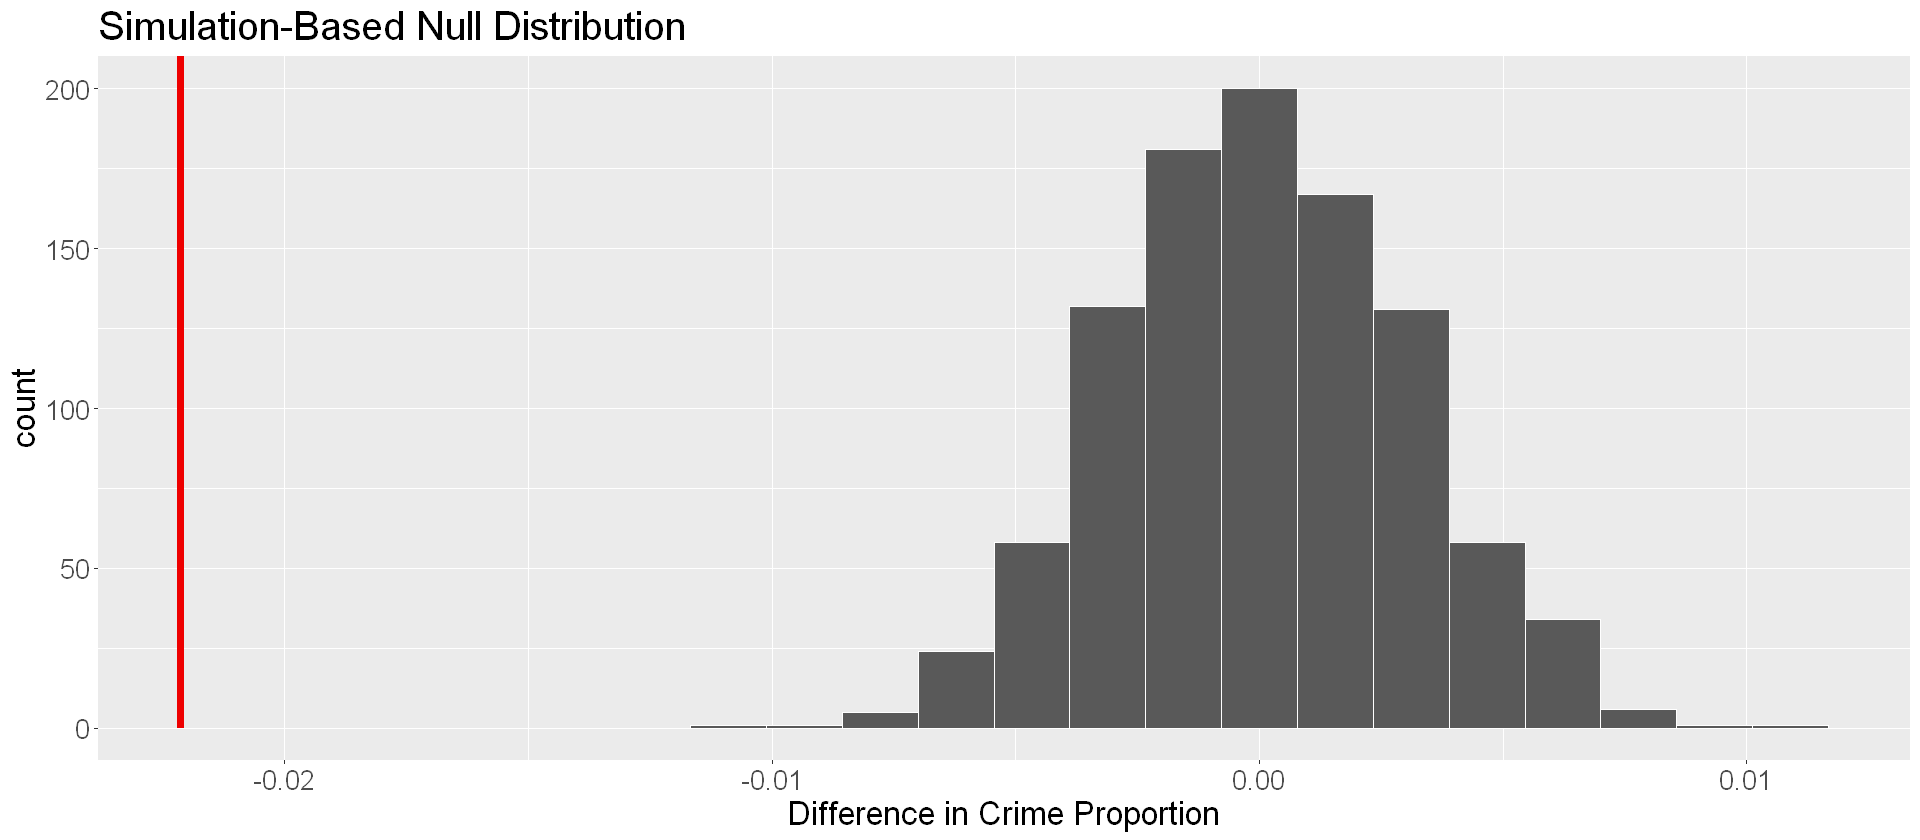

In [6]:
set.seed(12)

# Combine both data sets into a single data set
bike_theft_2012_2022 <- rbind(mutate(cbd_2012, year = "2012"), mutate(cbd_2022, year = "2022")) |>
    mutate(yn_bt = ifelse(TYPE == "Theft of Bicycle", "yes", "no"))
head(bike_theft_2012_2022)

# Generate the null distribution
null_dist <- bike_theft_2012_2022 |>
    specify(formula = yn_bt ~ year, success = "yes") |>
    hypothesise(null = "independence") |>
    generate(reps = 1000, type = "permute") |>
    calculate(stat = "diff in props", order = c("2022", "2012"))
head(null_dist)

# Visualize the null distribution
null_dist_vis <- null_dist |>
    visualize(bins = 15) + 
    shade_p_value(obs_stat = pull(diff_in_props_22_12), direction = "left") +
    xlab("Difference in Crime Proportion") + 
    theme(text = element_text(size = 20))
null_dist_vis

p_value_simulation <- null_dist |>
    get_p_value(obs_stat = pull(diff_in_props_22_12), direction = "left") |>
    pull()


### Method 2: 2 sample z-test
#### 2.1 Perform the test


In [23]:
set.seed(222)

null_model <- broom::tidy(
        prop.test(
        x= c(sum(cbd_2022$TYPE == "Theft of Bicycle"),
        sum(cbd_2012$TYPE == "Theft of Bicycle") ), 
        n= c(nrow(cbd_2022),
        nrow(cbd_2012) ), 
        alternative = "less",
        conf.level = 0.05,
                 correct= FALSE))
null_model

data %>% filter(x < qnorm(null_model$p.value))

qnorm(null_model$p.value))

ERROR: Error in parse(text = x, srcfile = src): <text>:16:26: 意外的')'
15: 
16: qnorm(null_model$p.value))
                             ^


# A tibble: 801 × 2
       x  density
   <dbl>    <dbl>
 1 -4    0.000134
 2 -3.99 0.000139
 3 -3.98 0.000145
 4 -3.97 0.000151
 5 -3.96 0.000157
 6 -3.95 0.000163
 7 -3.94 0.000170
 8 -3.93 0.000177
 9 -3.92 0.000184
10 -3.91 0.000191
# ℹ 791 more rows


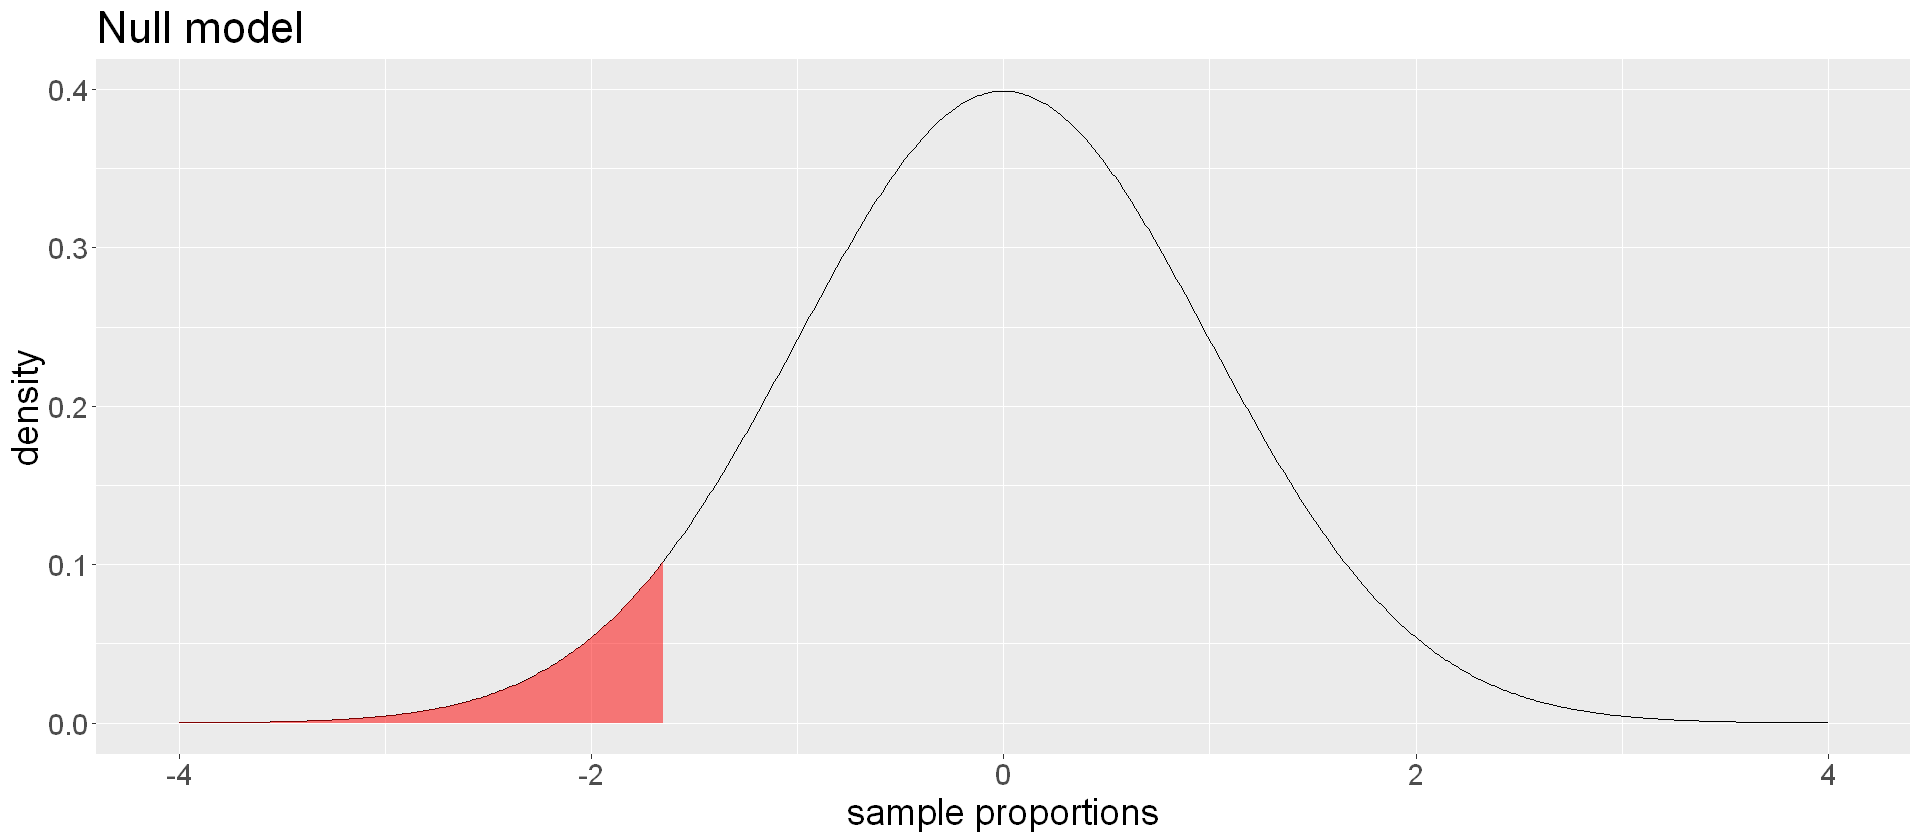

In [21]:
data <- tibble(x = seq(-4, 4, 0.01), density = dnorm(x))
print(data)
null_model <- data %>% 
    ggplot() + 
    geom_line(aes(x, density)) +
    geom_ribbon(data %>% filter(x < qnorm(0.05)),
        mapping = aes(x = x, ymax = density, ymin = 0), alpha = 0.5, fill = "red") + 
 #   geom_ribbon(data %>% filter(x < qnorm(null_model$p.value)),
 #       mapping = aes(x = x, ymax = density, ymin = 0), alpha = 0.5, fill = "blue") + 
    theme(text = element_text(size=22)) + 
    xlab("sample proportions")  +   ggtitle("Null model") 

# pvalue_plot <- null_model +  geom_ribbon(. %>% filter(x > qnorm(0.84, 0.5, 0.05)),
#                 mapping = aes(x = x, ymax = density, ymin = 0), alpha = 0.5, fill = "red")

null_model

In [9]:
null_model$p.value < 0.5

p_value_simulation < 0.5

logical(0)

[1] TRUE

As shown, the p-values from both the theoretical and simulation based methods are less than the significance level of 0.5. Therefore, for both methods, it is statistically significant, and we reject $H_0$. This indicating that there's a significant difference in the proportions of bike thefts and Project 529 may be effective in reducing bike theft in Downtown.

#### 2.2 Confidence Intervals
##### 2.2.1 Percentile


Then, calculate &mu; and &sigma;, get the 95% confidence interval with `qnorm()`.

- Use standard error method, CLT, percentile

- compute TYPEI & II ERROR, POWER OF TEST

## Discussion

From our investigation, we expect to either reject or fail to reject the null hypothesis and find a CI for the true difference in proportion to find out whether or not Project 529 was indeed effective. 

If our findings suggest the program is effective, it can justify continued or increased resources towards the program, as well as towards establishing similar programs in other cities. If no significant impact is found, a better strategy can be implemented to reduce bike theft.

Additional research could examine the resource and cost-effectiveness of Project 529. Is the reduction in bike theft worth the investment? Are there more efficient alternatives? 


## References 

Dataset source: https://geodash.vpd.ca/opendata 

Ballard, J. (2021, February 4). Vancouver still has the most bike thefts per capita among major Canadian cities despite efforts. CBC News. https://www.cbc.ca/news/canada/british-columbia/vancouver-still-has-the-most-bike-thefts-per-capita-among-major-canadian-cities-despite-efforts-1.5898575

Malleson N, Steenbeek W, Andresen MA (2019). Identifying the appropriate spatial resolution for the analysis of crime patterns. PLoS One. 2019 Jun 26;14(6):e0218324. doi: 10.1371/journal.pone.0218324.

McIntyre, G. (2023, June 9). The state of bike thefts in Vancouver. Vancouver Sun. https://vancouversun.com/news/local-news/the-state-of-bike-thefts-in-vancouver

Nettle D, Nott K, Bateson M. 'Cycle thieves, we are watching you': impact of a simple signage intervention against bicycle theft. PLoS One. 2012;7(12):e51738. doi: 10.1371/journal.pone.0051738. Epub 2012 Dec 12. PMID: 23251615; PMCID: PMC3520908.

Vancouver Police Department. (n.d.). Bike theft protection. https://vpd.ca/crime-prevention-safety/bike-theft-protection/
